In [1]:
# Extracted relationships from the documents
# Format: (Variable A, Variable B)
relationships = [
    ("XMEAS_6", "XMEAS_7"),
    ("XMEAS_9", "XMEAS_23"),
    ("XMEAS_11", "XMEAS_12"),
    ("XMEAS_4", "XMEAS_15"),
    ("XMEAS_10", "XMEAS_29"),
    ("XMEAS_22", "XMEAS_37"),
    ("XMEAS_5", "XMEAS_6"),
    ("XMEAS_8", "XMEAS_7"),
    ("XMEAS_18", "XMEAS_17"),
    ("XMEAS_19", "XMEAS_18"),
    ("XMEAS_20", "XMEAS_5"),
    ("XMEAS_21", "XMEAS_9"),
    ("XMV_1", "XMEAS_2"),
    ("XMV_12", "XMEAS_9"),
    ("XMV_5", "XMEAS_20"),
]

# Identifying all unique variables
unique_vars = sorted(set([var for relationship in relationships for var in relationship]))

# Mapping variables to indices for adjacency matrix representation
var_to_index = {var: index for index, var in enumerate(unique_vars)}

# Creating an adjacency matrix
n = len(unique_vars)
adj_matrix = [[0 for _ in range(n)] for _ in range(n)]

# Populating the adjacency matrix with the relationships
for var_a, var_b in relationships:
    adj_matrix[var_to_index[var_a]][var_to_index[var_b]] = 1

# The adjacency matrix and mapping of variables to their respective indices are ready
var_to_index, adj_matrix


({'XMEAS_10': 0,
  'XMEAS_11': 1,
  'XMEAS_12': 2,
  'XMEAS_15': 3,
  'XMEAS_17': 4,
  'XMEAS_18': 5,
  'XMEAS_19': 6,
  'XMEAS_2': 7,
  'XMEAS_20': 8,
  'XMEAS_21': 9,
  'XMEAS_22': 10,
  'XMEAS_23': 11,
  'XMEAS_29': 12,
  'XMEAS_37': 13,
  'XMEAS_4': 14,
  'XMEAS_5': 15,
  'XMEAS_6': 16,
  'XMEAS_7': 17,
  'XMEAS_8': 18,
  'XMEAS_9': 19,
  'XMV_1': 20,
  'XMV_12': 21,
  'XMV_5': 22},
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0,

In [2]:
from collections import deque

def bfs(adj_matrix, start, goal):
    """
    Perform BFS on the adjacency matrix from start to goal.
    :param adj_matrix: The adjacency matrix representing the graph.
    :param start: The starting variable index.
    :param goal: The goal variable index.
    :return: True if a path exists, False otherwise.
    """
    visited = [False] * len(adj_matrix)
    queue = deque([start])

    while queue:
        vertex = queue.popleft()
        if vertex == goal:
            return True
        visited[vertex] = True
        for i in range(len(adj_matrix)):
            if adj_matrix[vertex][i] == 1 and not visited[i]:
                queue.append(i)
    return False

# Create a new matrix to represent indirect causal relationships
# (if a path exists between two variables, mark as 1)
indirect_causality_matrix = [[0 for _ in range(n)] for _ in range(n)]

# Compute indirect causality using BFS
for i in range(n):
    for j in range(n):
        if i != j:
            indirect_causality_matrix[i][j] = 1 if bfs(adj_matrix, i, j) else 0

indirect_causality_matrix


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

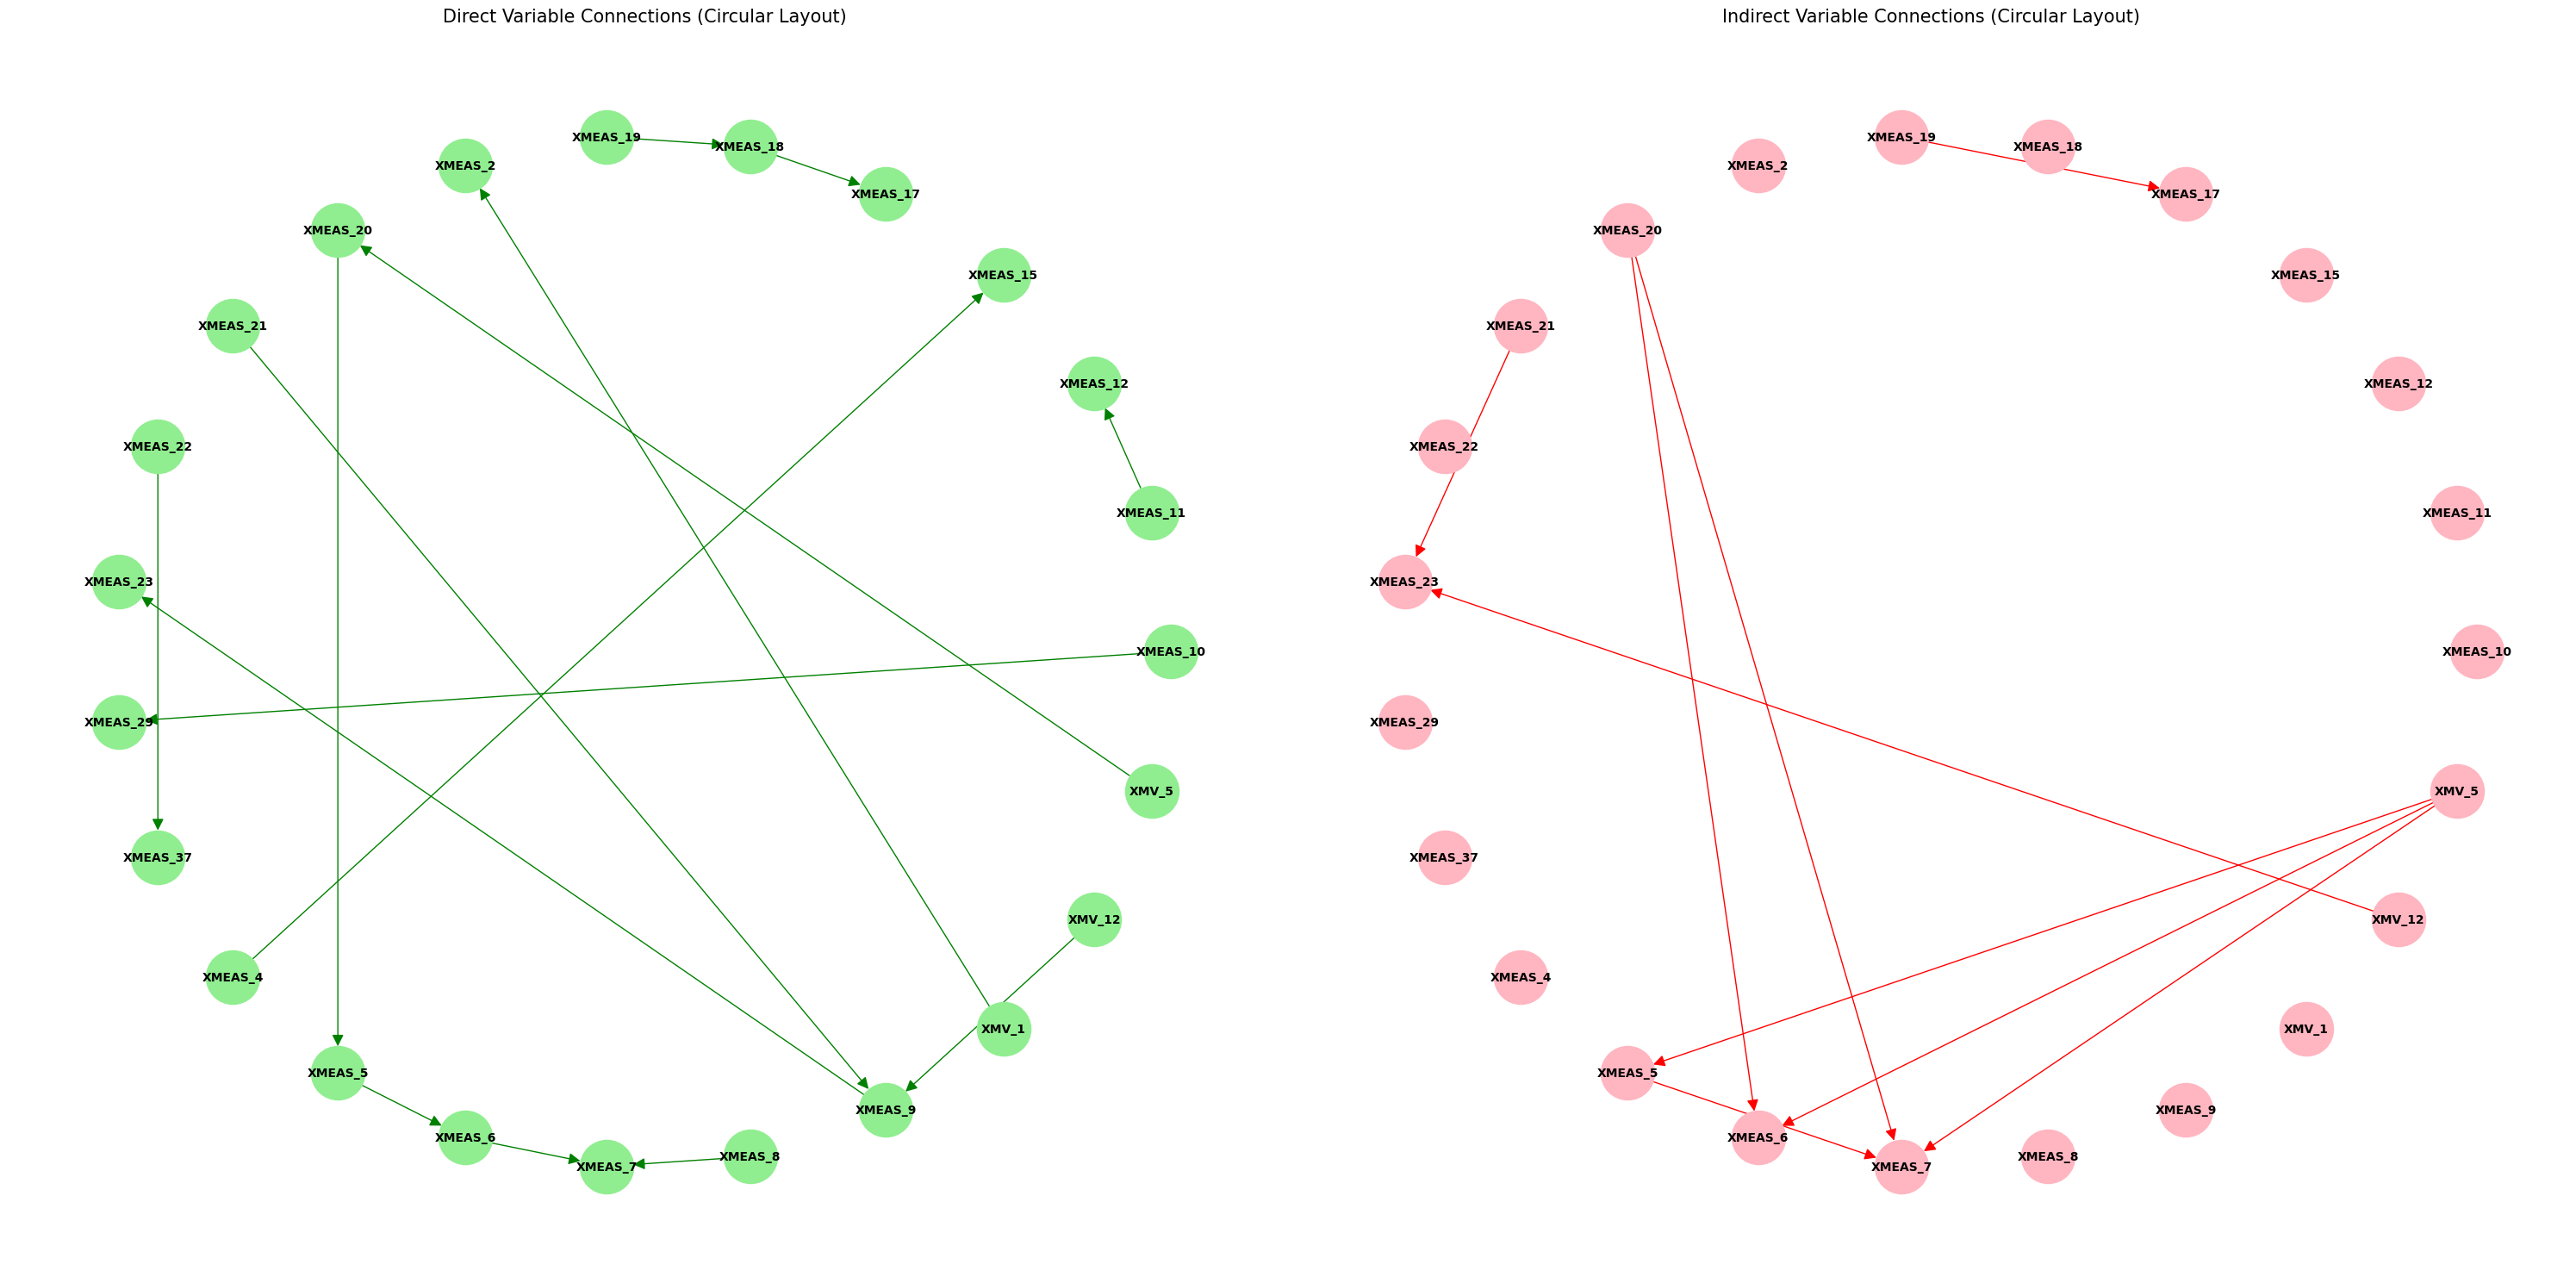

In [3]:

import matplotlib.pyplot as plt
import networkx as nx
# We will now create graphs for both direct and indirect relationships for clearer distinction.

# Create directed graphs for direct and indirect relationships
G_direct = nx.DiGraph()
G_indirect = nx.DiGraph()

# Add nodes with their labels for both graphs
for var, index in var_to_index.items():
    G_direct.add_node(index, label=var)
    G_indirect.add_node(index, label=var)

# Add edges based on the original adjacency matrix for direct relationships
for i in range(n):
    for j in range(n):
        if adj_matrix[i][j] == 1:
            G_direct.add_edge(i, j)

# Add edges for indirect relationships
for i in range(n):
    for j in range(n):
        # Only add an edge if it's an indirect relationship (not directly mentioned in the original matrix)
        if indirect_causality_matrix[i][j] == 1 and adj_matrix[i][j] != 1:
            G_indirect.add_edge(i, j)

# Attempting a different visualization approach using the circular layout for clearer distinction
# and to manage overlaps especially in dense areas of the graph.

plt.figure(figsize=(30, 15))

# Direct Relationships with Circular Layout
plt.subplot(1, 2, 1)
pos_circular_direct = nx.circular_layout(G_direct)  # positions for all nodes in a circular layout
nx.draw(G_direct, pos_circular_direct, with_labels=True, labels=nx.get_node_attributes(G_direct, 'label'), node_size=2000, node_color="lightgreen", font_size=10, font_weight="bold", edge_color="green", arrowsize=20)
plt.title("Direct Variable Connections (Circular Layout)", size=15)

# Indirect Relationships with Circular Layout
plt.subplot(1, 2, 2)
pos_circular_indirect = nx.circular_layout(G_indirect)  # Use the circular layout for consistency
nx.draw(G_indirect, pos_circular_indirect, with_labels=True, labels=nx.get_node_attributes(G_indirect, 'label'), node_size=2000, node_color="lightpink", font_size=10, font_weight="bold", edge_color="red", arrowsize=20)
plt.title("Indirect Variable Connections (Circular Layout)", size=15)

plt.tight_layout()
plt.show()




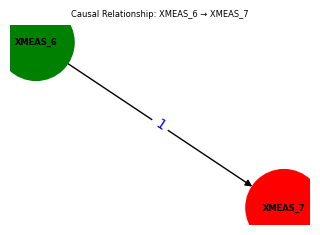

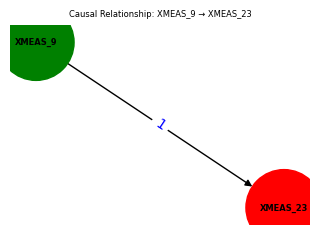

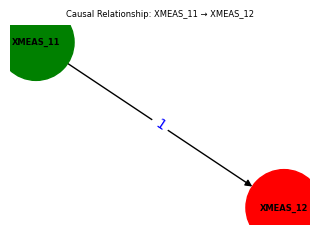

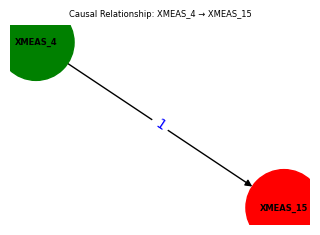

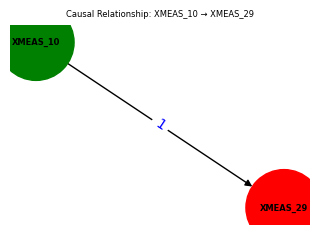

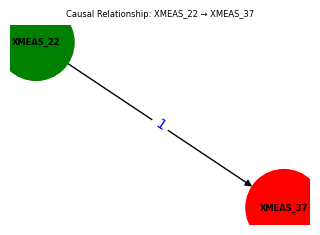

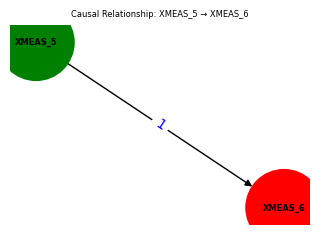

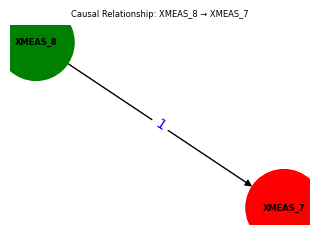

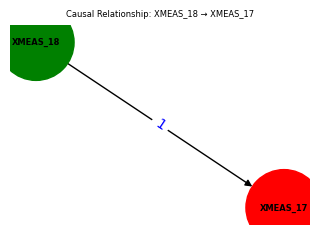

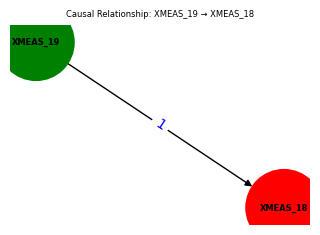

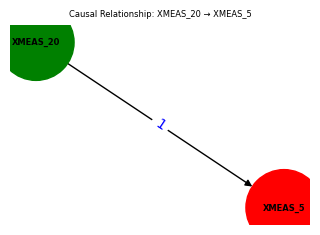

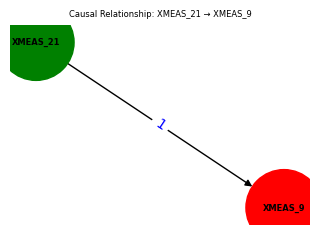

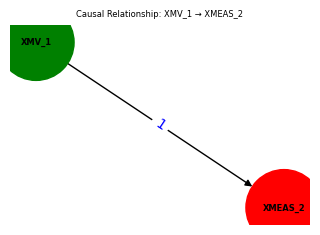

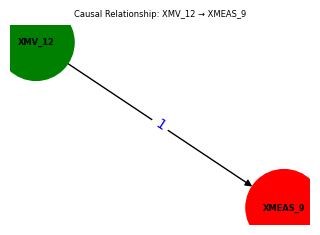

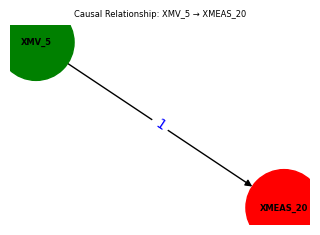

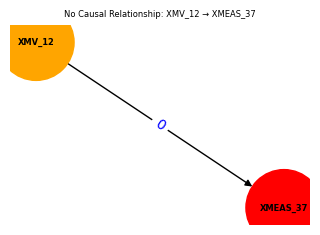

In [4]:
# Creating visualizations for all variable pairs, including both causal relationships (marked with 1) and no causal relationships (marked with 0)
key_pairs_no_causal = [
    ("XMV_12", "XMEAS_37"),  # Previously discussed pair with no indirect path found
]
all_pairs = relationships + key_pairs_no_causal  # Combining all pairs

# Iterate through all_pairs to create visualizations with either 0 or 1 marked on the arrows
for var_a, var_b in all_pairs:
    # Check if there's a causal relationship from the indirect causality matrix
    if (var_a, var_b) in relationships:  # If the pair is in the documented relationships, mark with 1
        weight = 1
    else:  # Otherwise, mark with 0 indicating no documented causal relationship
        weight = 0

    # Create a subgraph for the pair
    G_pair_marked = nx.DiGraph()
    G_pair_marked.add_node(var_a, color='green' if weight == 1 else 'orange')
    G_pair_marked.add_node(var_b, color='red')
    G_pair_marked.add_edge(var_a, var_b, weight=weight)

    # Plot configuration
    plt.figure(figsize=(3, 2))
    pos_pair_marked = nx.spring_layout(G_pair_marked, seed=42)
    edge_labels = { (var_a, var_b): weight }

    # Drawing the graph
    nx.draw(G_pair_marked, pos_pair_marked, with_labels=True, node_size=3000, node_color=list(nx.get_node_attributes(G_pair_marked, 'color').values()), font_size=6, font_weight="bold")
    nx.draw_networkx_edge_labels(G_pair_marked, pos_pair_marked, edge_labels=edge_labels, font_color='blue')

    plt.title(f"{'Causal Relationship' if weight == 1 else 'No Causal Relationship'}: {var_a} → {var_b}", fontsize=6)
    plt.show()


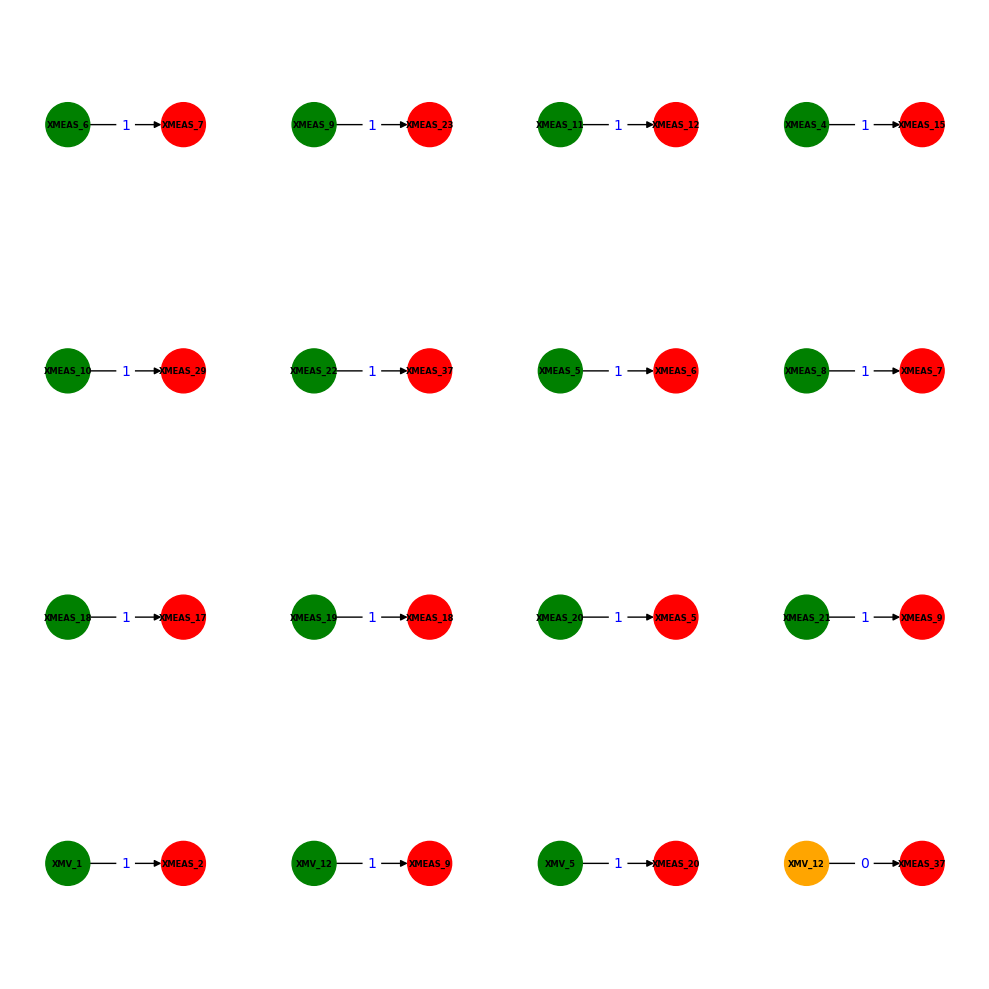

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to create a graph and plot for a given pair
def create_horizontal_graph(var_a, var_b, weight, ax):
    G = nx.DiGraph()
    G.add_edge(var_a, var_b, weight=weight)
    pos = {var_a: (0, 0.5), var_b: (1, 0.5)}  # Positions for horizontal layout

    edge_labels = {(var_a, var_b): str(weight)}
    nx.draw(G, pos, with_labels=True, ax=ax, node_size=1000, node_color=['green' if weight == 1 else 'orange', 'red'], font_size=6, font_weight="bold", arrowsize=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue', ax=ax)

    # Adjusting the view limits to "zoom out"
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(0, 1)
    ax.axis('off')

# Prepare the figure and axes for subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))  # Adjusted for 16 plots, increase if more pairs
axs = axs.flatten()  # Flatten to easily iterate over

# Iterate over all_pairs to plot each in its subplot
for i, (var_a, var_b) in enumerate(all_pairs[:16]):  # Limit to first 16 for demo
    weight = 1 if (var_a, var_b) in relationships else 0
    create_horizontal_graph(var_a, var_b, weight, axs[i])

# Hide any unused axes if the number of pairs is less than the number of subplots
for ax in axs[i+1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


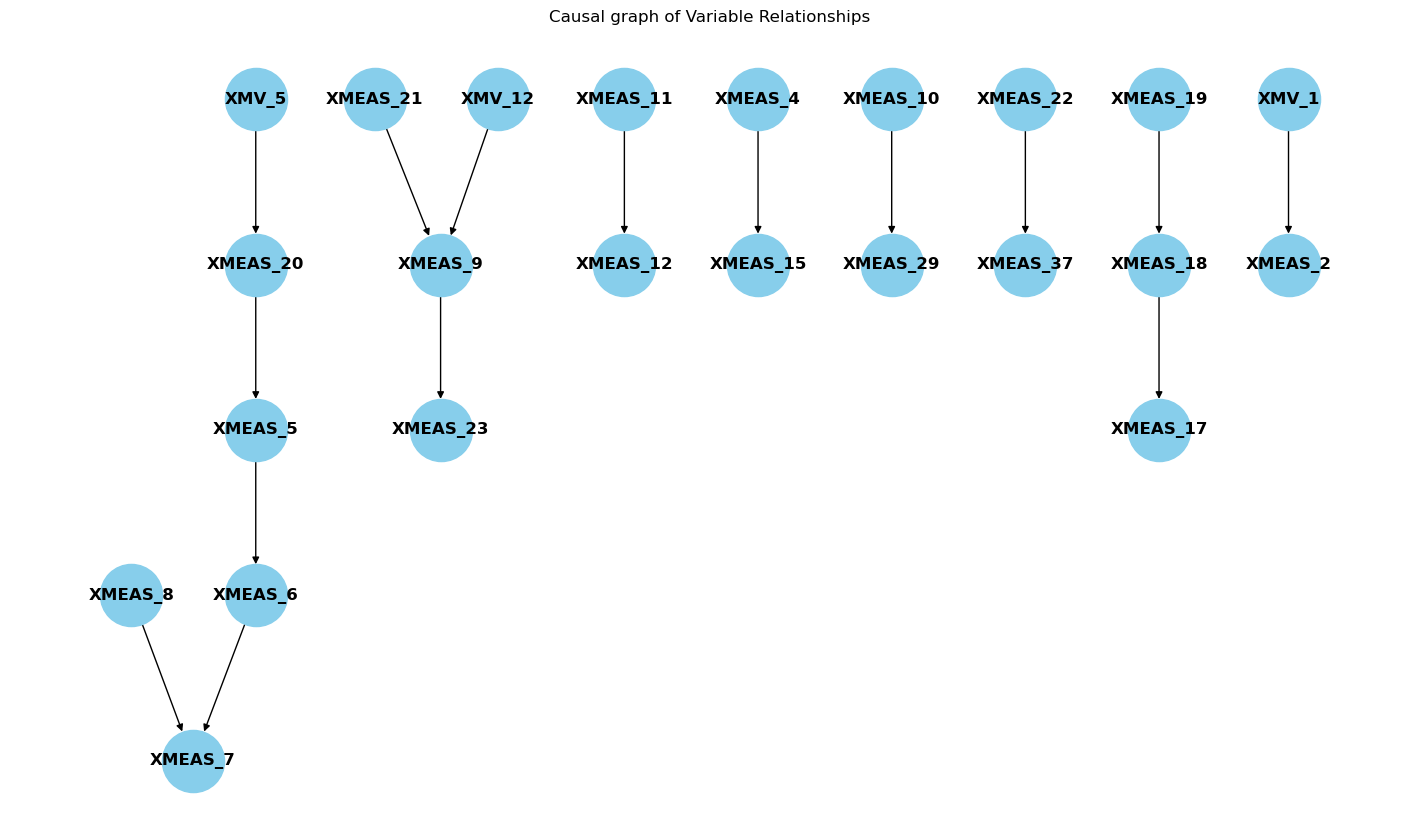

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Recreate relationships from extracted code cells
relationships = [
    ("XMEAS_6", "XMEAS_7"), ("XMEAS_9", "XMEAS_23"), ("XMEAS_11", "XMEAS_12"), ("XMEAS_4", "XMEAS_15"),
    ("XMEAS_10", "XMEAS_29"), ("XMEAS_22", "XMEAS_37"), ("XMEAS_5", "XMEAS_6"), ("XMEAS_8", "XMEAS_7"),
    ("XMEAS_18", "XMEAS_17"), ("XMEAS_19", "XMEAS_18"), ("XMEAS_20", "XMEAS_5"), ("XMEAS_21", "XMEAS_9"),
    ("XMV_1", "XMEAS_2"), ("XMV_12", "XMEAS_9"), ("XMV_5", "XMEAS_20")
]

# Create a directed graph from relationships
G = nx.DiGraph()
G.add_edges_from(relationships)

# Use a hierarchical layout to visually represent the graph as a tree
# Here we use the 'dot' layout from Graphviz via pygraphviz or pydot
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

# Drawing the graph
plt.figure(figsize=(14, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight="bold", arrows=True)
plt.title("Causal graph of Variable Relationships")
plt.show()


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# All relationships considered true based on expert knowledge (both old and newly provided)
true_relationships = set([
    ("XMEAS_6", "XMEAS_7"), ("XMEAS_9", "XMEAS_23"), ("XMEAS_11", "XMEAS_12"), ("XMEAS_4", "XMEAS_15"),
    ("XMEAS_10", "XMEAS_29"), ("XMEAS_22", "XMEAS_37"), ("XMEAS_5", "XMEAS_6"), ("XMEAS_8", "XMEAS_7"),
    ("XMEAS_18", "XMEAS_17"), ("XMEAS_19", "XMEAS_18"), ("XMEAS_20", "XMEAS_5"), ("XMEAS_21", "XMEAS_9"),
    ("XMV_1", "XMEAS_2"), ("XMV_12", "XMEAS_9"), ("XMV_5", "XMEAS_20"),
    # New relationships
    ("XMEAS_26", "XMEAS_37"), ("XMV_3", "XMEAS_1"), ("XMEAS_14", "XMV_7"),
    ("XMEAS_3", "XMV_2"), ("XMEAS_31", "XMEAS_10"), ("XMEAS_16", "XMV_9")
])

# Predicted relationships from the graph (existing in the graph)
predicted_relationships = set(G.edges())

# Convert relationships to binary format for evaluation
y_true = [1 if rel in true_relationships else 0 for rel in predicted_relationships.union(true_relationships)]
y_pred = [1 if rel in predicted_relationships else 0 for rel in predicted_relationships.union(true_relationships)]

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

accuracy, precision, recall, f1


(0.7142857142857143, 1.0, 0.7142857142857143, 0.8333333333333333)

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Existing relationships from the notebook
existing_relationships = [
    ("XMEAS_6", "XMEAS_7"),
    ("XMEAS_9", "XMEAS_23"),
    ("XMEAS_11", "XMEAS_12"),
    ("XMEAS_4", "XMEAS_15"),
    ("XMEAS_10", "XMEAS_29"),
    ("XMEAS_22", "XMEAS_37"),
    ("XMEAS_5", "XMEAS_6"),
    ("XMEAS_8", "XMEAS_7"),
    ("XMEAS_18", "XMEAS_17"),
    ("XMEAS_19", "XMEAS_18"),
    ("XMEAS_20", "XMEAS_5"),
    ("XMEAS_21", "XMEAS_9"),
    ("XMV_1", "XMEAS_2"),
    ("XMV_12", "XMEAS_9"),
    ("XMV_5", "XMEAS_20")
]

# New relationships provided
new_relationships = [
    ("XMEAS_26", "XMEAS_37"),
    ("XMV_3", "XMEAS_1"),
    ("XMEAS_14", "XMV_7"),
    ("XMEAS_3", "XMV_2"),
    ("XMEAS_31", "XMEAS_10"),
    ("XMEAS_16", "XMV_9")
]

# Combine existing and new relationships
all_relationships = existing_relationships + new_relationships

# Create a directed graph from all relationships
G = nx.DiGraph()
G.add_edges_from(all_relationships)

# True relationships (expert knowledge, both old and newly provided)
true_relationships = set(all_relationships)

# Predicted relationships (existing in the graph)
predicted_relationships = set(G.edges())

# Evaluate metrics for existing relationships
y_true_existing = [1 if rel in set(existing_relationships) else 0 for rel in predicted_relationships.union(set(existing_relationships))]
y_pred_existing = [1 if rel in predicted_relationships else 0 for rel in predicted_relationships.union(set(existing_relationships))]

# Evaluate metrics for new relationships
y_true_new = [1 if rel in set(new_relationships) else 0 for rel in predicted_relationships.union(set(new_relationships))]
y_pred_new = [1 if rel in predicted_relationships else 0 for rel in predicted_relationships.union(set(new_relationships))]

# Calculate evaluation metrics for existing and new
metrics_existing = {
    "Accuracy": accuracy_score(y_true_existing, y_pred_existing),
    "Precision": precision_score(y_true_existing, y_pred_existing),
    "Recall": recall_score(y_true_existing, y_pred_existing),
    "F1 Score": f1_score(y_true_existing, y_pred_existing)
}

metrics_new = {
    "Accuracy": accuracy_score(y_true_new, y_pred_new),
    "Precision": precision_score(y_true_new, y_pred_new),
    "Recall": recall_score(y_true_new, y_pred_new),
    "F1 Score": f1_score(y_true_new, y_pred_new)
}

metrics_existing

{'Accuracy': 0.7142857142857143,
 'Precision': 0.7142857142857143,
 'Recall': 1.0,
 'F1 Score': 0.8333333333333333}

In [9]:
metrics_new = {
    "Accuracy": accuracy_score(y_true_new, y_pred_new),
    "Precision": precision_score(y_true_new, y_pred_new),
    "Recall": recall_score(y_true_new, y_pred_new),
    "F1 Score": f1_score(y_true_new, y_pred_new)
}
metrics_new

{'Accuracy': 0.2857142857142857,
 'Precision': 0.2857142857142857,
 'Recall': 1.0,
 'F1 Score': 0.4444444444444445}

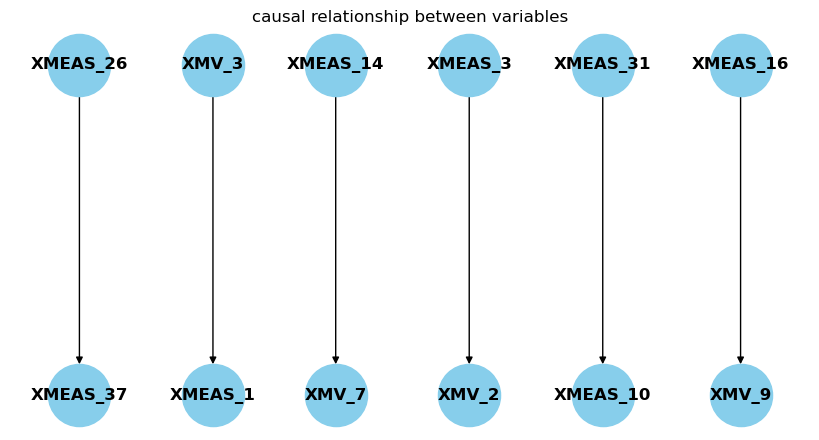

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Recreate relationships from extracted code cells
relationships = [
     ("XMEAS_26", "XMEAS_37"),
    ("XMV_3", "XMEAS_1"),
    ("XMEAS_14", "XMV_7"),
    ("XMEAS_3", "XMV_2"),
    ("XMEAS_31", "XMEAS_10"),
    ("XMEAS_16", "XMV_9")
]

# Create a directed graph from relationships
G = nx.DiGraph()
G.add_edges_from(relationships)

# Use a hierarchical layout to visually represent the graph as a tree
# Here we use the 'dot' layout from Graphviz via pygraphviz or pydot
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

# Drawing the graph
plt.figure(figsize=(8, 4))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight="bold", arrows=True)
plt.title("causal relationship between variables")
plt.show()


In [26]:
relationships = [
     ("XMEAS_26", "XMEAS_37"),
    ("XMV_3", "XMEAS_1"),
    ("XMEAS_14", "XMV_7"),
    ("XMEAS_3", "XMV_2"),
    ("XMEAS_31", "XMEAS_10"),
    ("XMEAS_16", "XMV_9")
]

# Identifying all unique variables
unique_vars = sorted(set([var for relationship in relationships for var in relationship]))

# Mapping variables to indices for adjacency matrix representation
var_to_index = {var: index for index, var in enumerate(unique_vars)}

# Creating an adjacency matrix
n = len(unique_vars)
adj_matrix = [[0 for _ in range(n)] for _ in range(n)]

# Populating the adjacency matrix with the relationships
for var_a, var_b in relationships:
    adj_matrix[var_to_index[var_a]][var_to_index[var_b]] = 1

# The adjacency matrix and mapping of variables to their respective indices are ready
var_to_index, adj_matrix


({'XMEAS_1': 0,
  'XMEAS_10': 1,
  'XMEAS_14': 2,
  'XMEAS_16': 3,
  'XMEAS_26': 4,
  'XMEAS_3': 5,
  'XMEAS_31': 6,
  'XMEAS_37': 7,
  'XMV_2': 8,
  'XMV_3': 9,
  'XMV_7': 10,
  'XMV_9': 11},
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [27]:
from collections import deque

def bfs(adj_matrix, start, goal):
    """
    Perform BFS on the adjacency matrix from start to goal.
    :param adj_matrix: The adjacency matrix representing the graph.
    :param start: The starting variable index.
    :param goal: The goal variable index.
    :return: True if a path exists, False otherwise.
    """
    visited = [False] * len(adj_matrix)
    queue = deque([start])

    while queue:
        vertex = queue.popleft()
        if vertex == goal:
            return True
        visited[vertex] = True
        for i in range(len(adj_matrix)):
            if adj_matrix[vertex][i] == 1 and not visited[i]:
                queue.append(i)
    return False

# Create a new matrix to represent indirect causal relationships
# (if a path exists between two variables, mark as 1)
indirect_causality_matrix = [[0 for _ in range(n)] for _ in range(n)]

# Compute indirect causality using BFS
for i in range(n):
    for j in range(n):
        if i != j:
            indirect_causality_matrix[i][j] = 1 if bfs(adj_matrix, i, j) else 0

indirect_causality_matrix


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

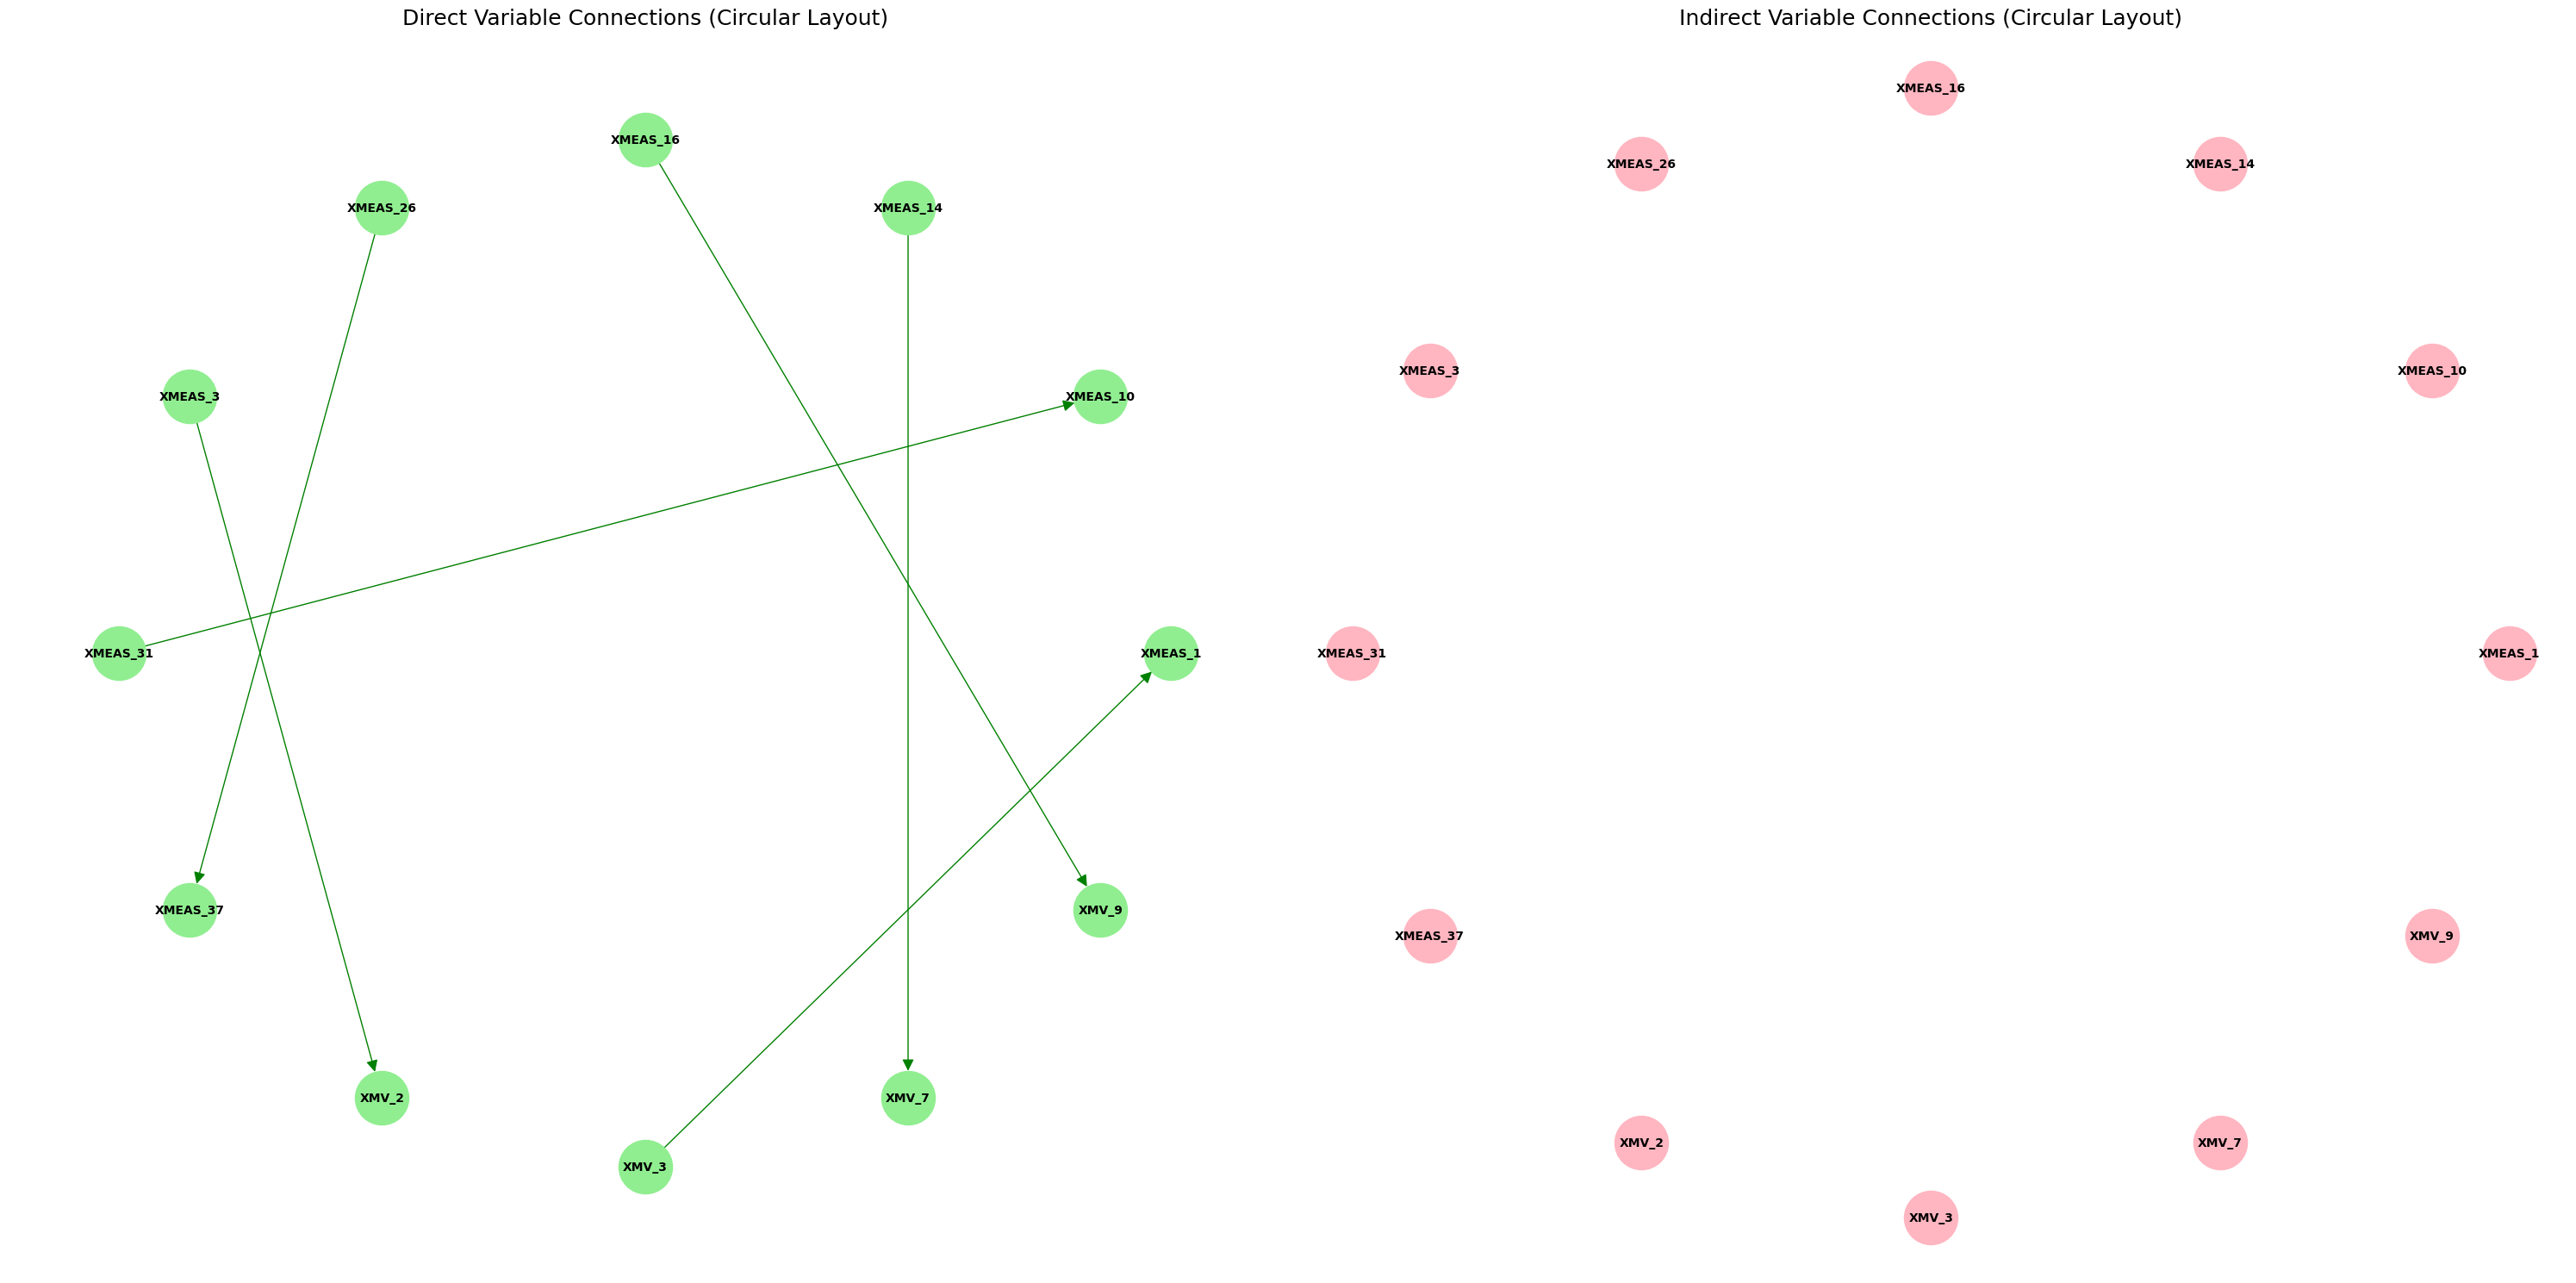

In [30]:
import matplotlib.pyplot as plt
import networkx as nx
# We will now create graphs for both direct and indirect relationships for clearer distinction.

# Create directed graphs for direct and indirect relationships
G_direct = nx.DiGraph()
G_indirect = nx.DiGraph()

# Add nodes with their labels for both graphs
for var, index in var_to_index.items():
    G_direct.add_node(index, label=var)
    G_indirect.add_node(index, label=var)

# Add edges based on the original adjacency matrix for direct relationships
for i in range(n):
    for j in range(n):
        if adj_matrix[i][j] == 1:
            G_direct.add_edge(i, j)

# Add edges for indirect relationships
for i in range(n):
    for j in range(n):
        # Only add an edge if it's an indirect relationship (not directly mentioned in the original matrix)
        if indirect_causality_matrix[i][j] == 1 and adj_matrix[i][j] != 1:
            G_indirect.add_edge(i, j)

# Attempting a different visualization approach using the circular layout for clearer distinction
# and to manage overlaps especially in dense areas of the graph.

plt.figure(figsize=(30, 15))

# Direct Relationships with Circular Layout
plt.subplot(1, 2, 1)
pos_circular_direct = nx.circular_layout(G_direct)  # positions for all nodes in a circular layout
nx.draw(G_direct, pos_circular_direct, with_labels=True, labels=nx.get_node_attributes(G_direct, 'label'), node_size=2000, node_color="lightgreen", font_size=10, font_weight="bold", edge_color="green", arrowsize=20)
plt.title("Direct Variable Connections (Circular Layout)", size=18)

# Indirect Relationships with Circular Layout
plt.subplot(1, 2, 2)
pos_circular_indirect = nx.circular_layout(G_indirect)  # Use the circular layout for consistency
nx.draw(G_indirect, pos_circular_indirect, with_labels=True, labels=nx.get_node_attributes(G_indirect, 'label'), node_size=2000, node_color="lightpink", font_size=10, font_weight="bold", edge_color="red", arrowsize=20)
plt.title("Indirect Variable Connections (Circular Layout)", size=18)

plt.tight_layout()
plt.show()


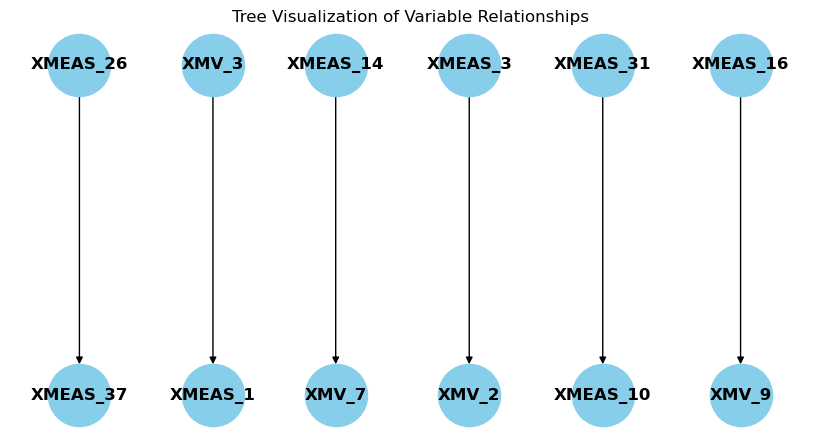

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

# Recreate relationships from extracted code cells
relationships = [
     ("XMEAS_26", "XMEAS_37"),
    ("XMV_3", "XMEAS_1"),
    ("XMEAS_14", "XMV_7"),
    ("XMEAS_3", "XMV_2"),
    ("XMEAS_31", "XMEAS_10"),
    ("XMEAS_16", "XMV_9")
]

# Create a directed graph from relationships
G = nx.DiGraph()
G.add_edges_from(relationships)

# Use a hierarchical layout to visually represent the graph as a tree
# Here we use the 'dot' layout from Graphviz via pygraphviz or pydot
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

# Drawing the graph
plt.figure(figsize=(8, 4))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight="bold", arrows=True)
plt.title("Tree Visualization of Variable Relationships")
plt.show()
